NAME : VISHWAKARMA POOJA RAMASHANKAR 
SR.NO : 00-0-0-40-52-22-1-21633

In [8]:
# Importing libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [9]:
data_df = pd.read_csv("../data/RawLeakData/4205.csv")
print(data_df.shape)
print(data_df["Meter ID"].unique())
data_df["Date"] = pd.to_datetime(data_df["Date"], errors='coerce')
data_df["Time"] = pd.to_datetime(data_df["Time"], errors='coerce')
data_df['Date'] = data_df['Date'] +  pd.to_timedelta(data_df['Time'].dt.hour, unit='h')
data_df['Date'] = data_df['Date'] +  pd.to_timedelta(data_df['Time'].dt.minute, unit='m')
data_df = data_df.drop(['Time'],axis=1)
data_df = data_df.set_axis(['Leak', 'Date', 'Flowrate', 'Netflow', 'Pressure', 'ID'], axis=1)
data_df.loc[(data_df["ID"] == 'SE3DM0702'), "ID"] = 1
data_df.loc[(data_df["ID"] == 'SE3DM0703'), "ID"] = 2
data_df.loc[(data_df["ID"] == 'SE3DM0701'), "ID"] = 3
data_df.loc[(data_df["ID"] == 'SE3DM1202'), "ID"] = 4
data_df.loc[(data_df["ID"] == 'SE3DM1301'), "ID"] = 5
data_df.loc[(data_df["ID"] == 'SE3DM0704'), "ID"] = 6

filtered_df1 = data_df.loc[(data_df['ID'] == 1)]
filtered_df2 = data_df.loc[(data_df['ID'] == 2)]
filtered_df3 = data_df.loc[(data_df['ID'] == 3)]
filtered_df4 = data_df.loc[(data_df['ID'] == 4)]
filtered_df5 = data_df.loc[(data_df['ID'] == 5)]
filtered_df6 = data_df.loc[(data_df['ID'] == 6)]

dta = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(filtered_df1, filtered_df2, on='Date', suffixes=("_1", "_2")),
                filtered_df3, on='Date', suffixes=("_3", "_4")
            ),
            filtered_df4, on="Date", suffixes=("_5", "_6")
        ),
        filtered_df5, on="Date", suffixes=("_7", "_8")
    ),
    filtered_df6, on="Date", suffixes=("_9", "_10")
)
# Apply z-score normalization and filtering for Flowrate columns
for i in range(1, 7):
    flowrate_column = f"Flowrate_{i}"
    if flowrate_column in dta.columns:
        # Convert the column to numeric type to exclude non-numeric values
        dta[flowrate_column] = pd.to_numeric(dta[flowrate_column], errors='coerce')
        dta = dta[(np.abs(stats.zscore(dta[[flowrate_column]], nan_policy='omit')) < 2).all(axis=1)]

# Apply z-score normalization and filtering for Pressure columns
for i in range(1, 7):
    pressure_column = f"Pressure_{i}"
    if pressure_column in dta.columns:
        # Convert the column to numeric type to exclude non-numeric values
        dta[pressure_column] = pd.to_numeric(dta[pressure_column], errors='coerce')
        dta = dta[(np.abs(stats.zscore(dta[[pressure_column]], nan_policy='omit')) < 2).all(axis=1)]
dta.loc[:,"LeakStatus"] = 0
dta.loc[(dta['Date'] >= '2017-11-01') & (dta['Date'] <= '2018-01-11'), "LeakStatus"] = 1
# TODO: To check with Sir
# fig, axs = plt.subplots(1, 1)
# #plt.ylim((0,20))
# plt.xticks(rotation=90)
# axs.scatter(dta["Date"],dta["Pressure_2"], marker='*', s=1)
# #axs.scatter(filtered_pdf2["Date"],filtered_pdf2["Pressure"], c='g', marker='.', s=1)
# #axs.scatter(filtered_pdf3["Date"],filtered_pdf3["Pressure"], c='r', marker='.', s=1)
# #axs.scatter(filtered_pdf4["Date"],filtered_pdf4["Pressure"], c='y', marker='.', s=1)
# axs.axvline(x = pd.Timestamp('2017-12-09'), color = 'r')
# Creating the directory if it doesn't exist
output_directory = "../data/EachLeakData"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
dta.to_csv("../data/EachLeakData/4205.csv", index=False)

(304662, 7)
['SE3DM0702' 'SE3DM0703' 'SE3DM0701' 'SE3DM1202' 'SE3DM1301' 'SE3DM0704']


/var/folders/wv/c6by5h8d0tz81wvfwp8rr4g40000gn/T/ipykernel_55938/3587540919.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df["Time"] = pd.to_datetime(data_df["Time"], errors='coerce')


In [10]:
print(dta.shape)
print(dta.isna().sum())
print(dta.columns)
dta

(30902, 32)
Leak_1         0
Date           0
Flowrate_1     0
Netflow_1      0
Pressure_1     0
ID_1           0
Leak_2         0
Flowrate_2     0
Netflow_2      0
Pressure_2     0
ID_2           0
Leak_5         0
Flowrate_5     0
Netflow_5      0
Pressure_5     0
ID_5           0
Leak_6         0
Flowrate_6     0
Netflow_6      0
Pressure_6     0
ID_6           0
Leak_9         0
Flowrate_9     0
Netflow_9      0
Pressure_9     0
ID_9           0
Leak_10        0
Flowrate_10    0
Netflow_10     0
Pressure_10    0
ID_10          0
LeakStatus     0
dtype: int64
Index(['Leak_1', 'Date', 'Flowrate_1', 'Netflow_1', 'Pressure_1', 'ID_1',
       'Leak_2', 'Flowrate_2', 'Netflow_2', 'Pressure_2', 'ID_2', 'Leak_5',
       'Flowrate_5', 'Netflow_5', 'Pressure_5', 'ID_5', 'Leak_6', 'Flowrate_6',
       'Netflow_6', 'Pressure_6', 'ID_6', 'Leak_9', 'Flowrate_9', 'Netflow_9',
       'Pressure_9', 'ID_9', 'Leak_10', 'Flowrate_10', 'Netflow_10',
       'Pressure_10', 'ID_10', 'LeakStatus'],
      d

,Leak_1,Date,Flowrate_1,Netflow_1,Pressure_1,ID_1,Leak_2,Flowrate_2,Netflow_2,Pressure_2,...,Flowrate_9,Netflow_9,Pressure_9,ID_9,Leak_10,Flowrate_10,Netflow_10,Pressure_10,ID_10,LeakStatus
27,7,2016-10-01 07:00:00,14.40,176811.7,0.0,1,7,0.01,186404.1,0.0,...,0.00,56620.99,0.00,5,7,7.68,129219.8,0.00,6,0
28,7,2016-10-01 07:15:00,0.69,176811.8,0.0,1,7,0.00,186404.1,0.0,...,0.11,56621.00,0.00,5,7,1.81,129219.7,0.00,6,0
29,7,2016-10-01 07:30:00,0.36,176811.9,0.0,1,7,0.00,186404.1,0.0,...,0.04,56621.01,0.00,5,7,0.09,129219.7,0.00,6,0
30,7,2016-10-01 07:45:00,0.09,176811.9,0.0,1,7,0.00,186404.1,0.0,...,0.00,56621.01,0.00,5,7,0.45,129219.8,0.00,6,0
31,7,2016-10-01 08:00:00,0.00,176811.9,0.0,1,7,0.00,186404.1,0.0,...,0.00,56621.01,0.00,5,7,0.42,129219.9,0.00,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38837,7,2018-03-22 15:45:00,0.23,335836.6,0.0,1,7,0.00,363761.7,0.0,...,0.96,101147.60,1.36,5,7,0.05,162738.3,4.80,6,0
38838,7,2018-03-22 16:00:00,0.39,335836.6,0.0,1,7,0.00,363761.7,0.0,...,0.98,101147.90,1.16,5,7,0.02,162738.3,4.96,6,0
38839,7,2018-03-22 16:15:00,0.15,335836.6,0.0,1,7,0.00,363761.7,0.0,...,0.88,101148.10,1.32,5,7,0.00,162738.3,0.00,6,0
38840,7,2018-03-22 16:30:00,0.00,335836.6,0.0,1,7,0.00,363761.7,0.0,...,1.13,101148.40,1.32,5,7,0.00,162738.3,1.20,6,0


In [11]:
# Selecting the features and target
X = dta[['Leak_1', 'Flowrate_1', 'Pressure_1', 'Flowrate_2', 'Pressure_2',
         'Flowrate_5', 'Pressure_5', 'Flowrate_6', 'Pressure_6',  
         'Flowrate_9','Pressure_9','Flowrate_10', 'Pressure_10']]
y = dta['LeakStatus']
print(X)
print(y)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Leak_1  Flowrate_1  Pressure_1  Flowrate_2  Pressure_2  Flowrate_5  \
27          7       14.40         0.0        0.01         0.0       52.55   
28          7        0.69         0.0        0.00         0.0        0.24   
29          7        0.36         0.0        0.00         0.0        1.83   
30          7        0.09         0.0        0.00         0.0        1.21   
31          7        0.00         0.0        0.00         0.0        3.03   
...       ...         ...         ...         ...         ...         ...   
38837       7        0.23         0.0        0.00         0.0      116.87   
38838       7        0.39         0.0        0.00         0.0       30.54   
38839       7        0.15         0.0        0.00         0.0       17.65   
38840       7        0.00         0.0        0.00         0.0       15.57   
38841       7        0.03         0.0        0.00         0.0       15.12   

       Pressure_5  Flowrate_6  Pressure_6  Flowrate_9  Pressure_9  \
27    

SVM Accuracy: 0.39
Train Accuracy: 0.3868522028570108
Test Accuracy: 0.38960198468342144
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.36      0.51      8354
           1       0.10      0.68      0.18       917

    accuracy                           0.39      9271
   macro avg       0.51      0.52      0.35      9271
weighted avg       0.83      0.39      0.48      9271

[[1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]]


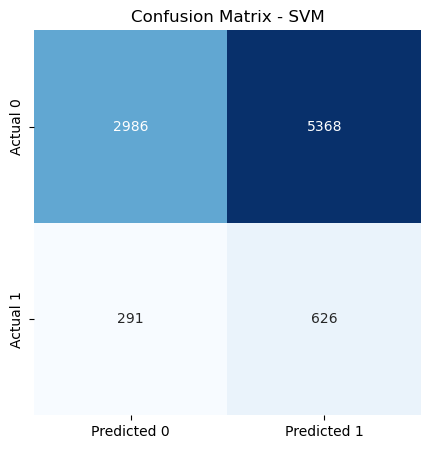

MLP Accuracy: 0.96
Train Accuracy: 0.9707826730155795
Test Accuracy: 0.9582569302124906
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8354
           1       0.82      0.74      0.78       917

    accuracy                           0.96      9271
   macro avg       0.90      0.86      0.88      9271
weighted avg       0.96      0.96      0.96      9271

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


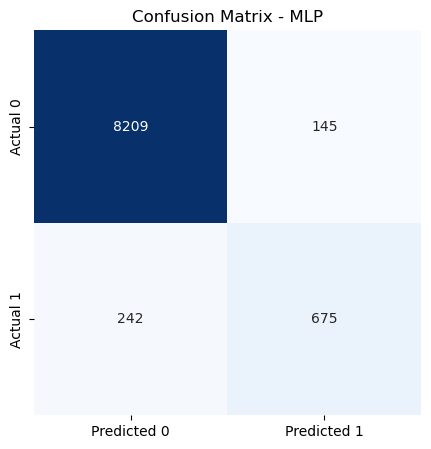

In [12]:
# Defining the models to evaluate
models = [
    ('SVM', SVC(C=3000000.0, kernel='rbf', class_weight='balanced')),
    ('MLP', MLPClassifier(hidden_layer_sizes=(1000, 100, 10), activation='relu', max_iter=3000000000))
]

# Loop through each model and evaluate
for name, model in models:
    # Training the model on the training data
    model.fit(X_train, y_train)
    # Making predictions on the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f'Train Accuracy: {model.score(X_train, y_train)}')
    print(f'Test Accuracy: {model.score(X_test, y_test)}')
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Printing the first 25 rows of predictions and actual values
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)[:25])

    # Plotting confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()